In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [4]:
data.head(20)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
5,5,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
6,6,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0
7,7,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
8,8,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
9,9,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304.0,18.4,396.90,15.94,19.8


In [5]:
data.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in the train dataset

In [6]:
data = data.drop(columns = ['ID'])

In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### **OUTLIERS DETECTION**

In [8]:
sum(((data.CRIM - data.CRIM.mean())/data.CRIM.std()) >3 )

7

In [9]:
sum(((data.CRIM - data.CRIM.mean())/data.CRIM.std()) <-3 )

0

In [10]:
q3 = data.CRIM .quantile(0.75)
q1 = data.CRIM.quantile(0.25)
q1,q3

(0.07782, 3.5434275)

In [11]:
iqr = q1 - q3
iqr

-3.4656075

In [12]:
q3 + (1.5 * iqr)

-1.6549837499999995

In [13]:
q1 - (1.5*iqr)

5.2762312499999995

In [14]:
data.CRIM = data.CRIM.clip(-1.65,5.27)

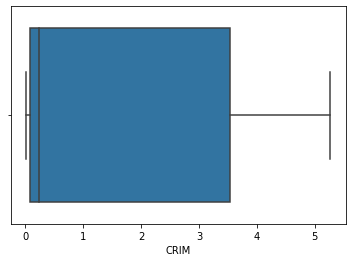

In [15]:
import seaborn as sns
sns.boxplot(x = 'CRIM',data = data)

In [16]:
sum(((data.ZN - data.ZN.mean())/data.ZN.std()) >3 )

22

In [17]:
sum(((data.ZN - data.ZN.mean())/data.ZN.std()) <-3 )

0

In [18]:
q3 = data.ZN .quantile(0.75)
q1 = data.ZN.quantile(0.25)
q1,q3

(0.0, 12.5)

In [19]:
iqr = q3-q1

In [20]:
q3 + (1.5 * iqr)

31.25

In [21]:
q1 - (1.5*iqr)

-18.75

In [22]:
data.ZN = data.ZN.clip (-13.11,21.85)

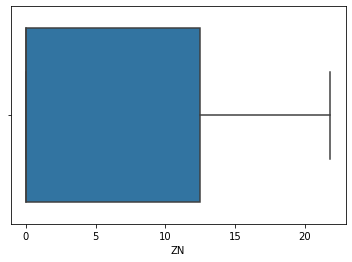

In [23]:
sns.boxplot(x = 'ZN', data = data)

In [24]:
sum(((data.INDUS- data.INDUS.mean())/data.INDUS.std()) >3 )

0

In [25]:
sum(((data.INDUS- data.INDUS.mean())/data.INDUS.std()) <-3 )

0

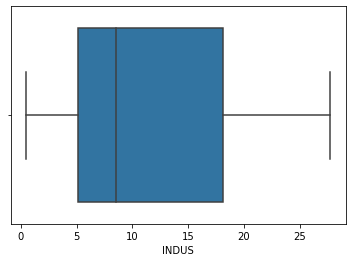

In [26]:
sns.boxplot(x = 'INDUS', data = data)

In [27]:
sum(((data.CHAS- data.CHAS.mean())/data.CHAS.std()) >3 )

29

In [28]:
q3 = data.CHAS.quantile(0.75)
q1 = data.CHAS.quantile(0.25)
q3,q1

(0.0, 0.0)

In [29]:
iqr = q3-1

In [30]:
q3+(1.5*iqr)

-1.5

In [31]:
q1-(1.5*iqr)

1.5

In [32]:
sum(((data.CHAS- data.CHAS.mean())/data.CHAS.std()) <-3 )

0

In [33]:
#data.CHAS = data.CHAS.clip(0,1)

In [34]:
sum(((data.NOX- data.NOX.mean())/data.NOX.std()) >3 )

0

In [35]:
sum(((data.NOX- data.NOX.mean())/data.NOX.std()) <-3 )

0

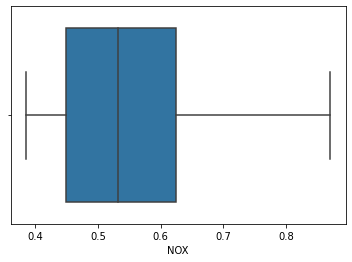

In [36]:
sns.boxplot(x = 'NOX', data = data)

In [37]:
sum(((data.RM- data.RM.mean())/data.RM.std()) >3 )

3

In [38]:
sum(((data.RM- data.RM.mean())/data.RM.std()) <-3 )

2

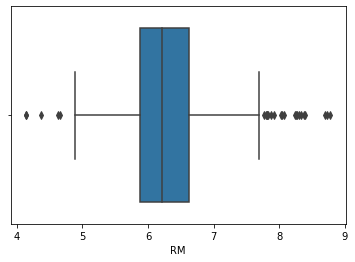

In [39]:
sns.boxplot(x = 'RM', data = data)

In [40]:
q3 = data.RM.quantile(0.75)
q1 = data.RM.quantile(0.25)
q3,q1

(6.6205, 5.8775)

In [41]:
iqr = q3-q1

In [42]:
q3+(1.5*iqr)

7.734999999999999

In [43]:
q1-(1.5*iqr)

4.763000000000002

In [44]:
data.RM = data.RM.clip(4.7,7.73)

In [45]:
sum(((data.AGE- data.AGE.mean())/data.AGE.std()) >3 )

0

In [46]:
sum(((data.AGE- data.AGE.mean())/data.AGE.std()) <-3 )

0

In [47]:
sum(((data.DIS- data.DIS.mean())/data.DIS.std()) >3 )

5

In [48]:
sum(((data.DIS- data.DIS.mean())/data.DIS.std()) <-3 )

0

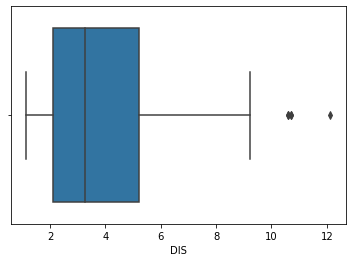

In [49]:
sns.boxplot(x = 'DIS', data = data)

In [50]:
q3 = data.DIS.quantile(0.75)
q1 = data.DIS.quantile(0.25)
q3,q1

(5.2146, 2.10915)

In [51]:
iqr = q3-q1
iqr

3.10545

In [52]:
q3+(1.5*iqr)

9.872775

In [53]:
q1-(1.5*iqr)

-2.549025

In [54]:
data.DIS = data.DIS.clip(-2.54,9.87)

In [55]:
sum(((data.RAD- data.RAD.mean())/data.RAD.std()) >3 )

0

In [56]:
sum(((data.RAD- data.RAD.mean())/data.RAD.std()) <-3 )

0

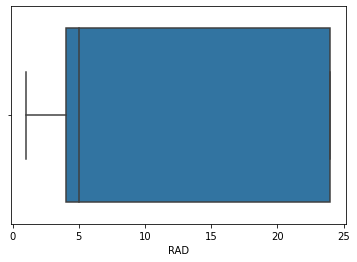

In [57]:
sns.boxplot(x = 'RAD', data = data)

In [58]:
sum(((data.TAX- data.TAX.mean())/data.TAX.std()) >3 )

0

In [59]:
sum(((data.TAX- data.TAX.mean())/data.TAX.std()) <-3 )

0

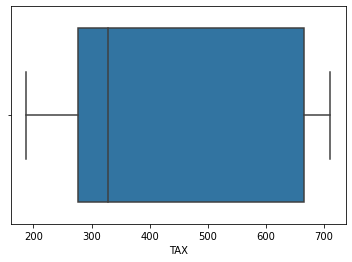

In [60]:
sns.boxplot(x = 'TAX', data = data)

In [61]:
sum(((data.PTRATIO-data.PTRATIO.mean())/data.PTRATIO.std()) >3 )

0

In [62]:
sum(((data.PTRATIO-data.PTRATIO.mean())/data.PTRATIO.std()) <-3 )

0

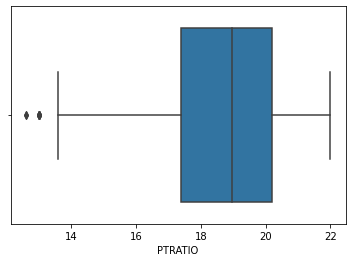

In [63]:
sns.boxplot(x = 'PTRATIO', data = data)

In [64]:
sum(((data.B-data.B.mean())/data.B.std())>3)

0

In [65]:
sum(((data.B-data.B.mean())/data.B.std())<-3)

21

In [66]:
q3=data.B.quantile(0.75)
q1=data.B.quantile(0.25)
q3,q1

(396.28499999999997, 376.115)

In [67]:
iqr = q3-q1
iqr

20.16999999999996

In [68]:
q3+(1.5*iqr)

426.5399999999999

In [69]:
q1-(1.5*iqr)

345.86000000000007

In [70]:
data.B = data.B.clip(345,426)

In [71]:
sum(((data.LSTAT-data.LSTAT.mean())/data.LSTAT.std())>3)

4

In [72]:
sum(((data.LSTAT-data.LSTAT.mean())/data.LSTAT.std())<-3)

0

In [73]:
q3 = data.LSTAT.quantile(0.75)
q1 = data.LSTAT.quantile(0.25)
q3,q1

(16.91, 6.99)

In [74]:
iqr = q3-q1
iqr

9.92

In [75]:
q3+(1.5*iqr)


31.79

In [76]:
q1-(1.5*iqr)

-7.889999999999999

In [77]:
data.LSTAT = data.LSTAT.clip(-7.8,31.79)

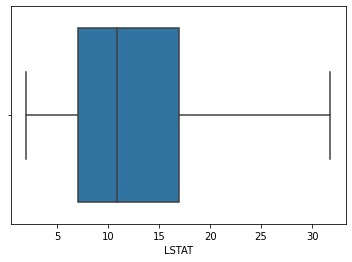

In [78]:
sns.boxplot(x = 'LSTAT', data = data)

In [79]:
sum(((data.MEDV- data.MEDV.mean())/data.MEDV.std()) >3 )

0

In [80]:
sum(((data.MEDV-data.MEDV.mean())/data.MEDV.std()) <-3)

0

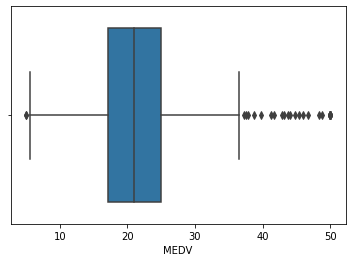

In [81]:
sns.boxplot(x = 'MEDV',data = data)

### **Co-Relation**

In [82]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [83]:
data[['CRIM','MEDV']].corr()

,CRIM,MEDV
CRIM,1.0000,-0.4467
MEDV,-0.4467,1.0000


In [84]:
data[['ZN','MEDV']].corr()

,ZN,MEDV
ZN,1.000000,0.374756
MEDV,0.374756,1.000000


In [85]:
data[['INDUS','MEDV']].corr()

,INDUS,MEDV
INDUS,1.000000,-0.502898
MEDV,-0.502898,1.000000


In [86]:
data[['CHAS','MEDV']].corr()

,CHAS,MEDV
CHAS,1.000000,0.182096
MEDV,0.182096,1.000000


In [87]:
data[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.434271
MEDV,-0.434271,1.000000


In [88]:
data[['RM','MEDV']].corr()

,RM,MEDV
RM,1.000000,0.711325
MEDV,0.711325,1.000000


In [89]:
data[['AGE','MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.354106
MEDV,-0.354106,1.000000


In [90]:
data[['DIS','MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.238514
MEDV,0.238514,1.000000


In [91]:
data[['RAD','MEDV']].corr()

,RAD,MEDV
RAD,1.000000,-0.386922
MEDV,-0.386922,1.000000


In [92]:
data[['TAX','MEDV']].corr()

,TAX,MEDV
TAX,1.000000,-0.479308
MEDV,-0.479308,1.000000


In [93]:
data[['PTRATIO','MEDV']].corr()

,PTRATIO,MEDV
PTRATIO,1.000000,-0.495904
MEDV,-0.495904,1.000000


In [94]:
data[['B','MEDV']].corr()

,B,MEDV
B,1.000000,0.264042
MEDV,0.264042,1.000000


In [95]:
data[['LSTAT','MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.732367
MEDV,-0.732367,1.000000


### **EXPLORATORY DATA ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


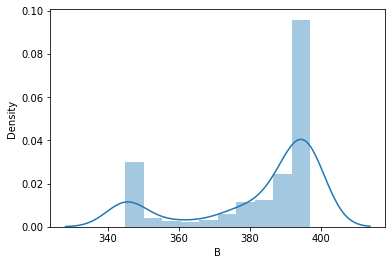

In [96]:
sns.distplot(data.B)

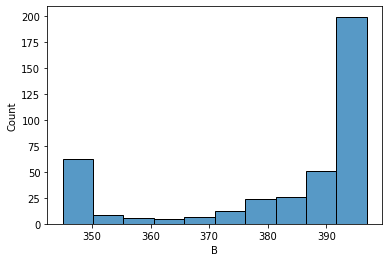

In [97]:
sns.histplot(data['B'])

In [98]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [99]:
import plotly.express as px

In [100]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.00,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,345.00,17.28,14.8
1,0.02875,21.85,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.00,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.27000,0.00,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.04544,0.00,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.03615,21.85,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,0.17505,0.00,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,5.27000,0.00,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,0.13117,0.00,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [101]:
X = data.iloc[:,0:13].values
y = data.iloc[:,-1].values

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [105]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [106]:
bcoeff_df = pd.DataFrame(regressor.coef_,['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)


In [107]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,13.3,12.362537
1,19.9,18.719254
2,23.1,25.302209
3,22.2,26.544591
4,18.9,19.361378
...,...,...
75,26.7,34.624990
76,17.4,14.742333
77,15.6,13.198181
78,21.0,21.397000


In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3.1572430529794926
Mean Squared Error: 16.211181080574136
R2- SCORE: 0.6158353477797766


In [109]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [111]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9817282392921841
Adjusted R^2: 0.9809519880202835
MAE: 0.8880406249999988
MSE: 1.7322651156249982
RMSE: 1.316155429888506


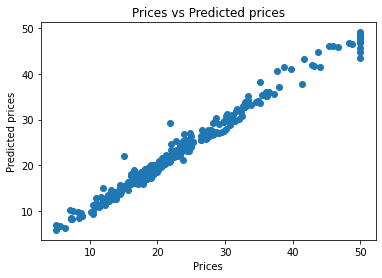

In [112]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [114]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [115]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6614754786110522
Adjusted R^2: 0.5947964062162594
MAE: 2.344525
MSE: 14.285234949999989
RMSE: 3.779581319405628


In [116]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

[04:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [117]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [118]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9829479290497218
Adjusted R^2: 0.9822234946629453
MAE: 0.9710564935207365
MSE: 1.6166317044472815
RMSE: 1.2714683261675384


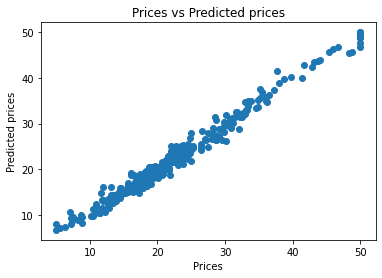

In [119]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

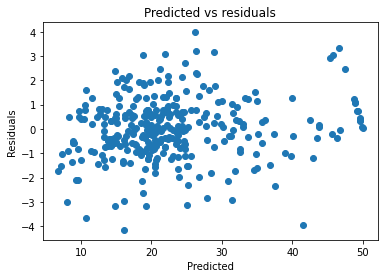

In [120]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [121]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [122]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7264935437315899
Adjusted R^2: 0.6726210599211455
MAE: 2.1972510695457457
MSE: 11.541568605150072
RMSE: 3.397288419482525


In [123]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [125]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [126]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [127]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.669290428063277
Adjusted R^2: 0.6552406750071417
MAE: 3.086031371101067
MSE: 31.35311719708593
RMSE: 5.59938543030268


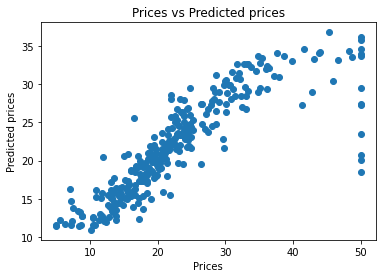

In [128]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [129]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [130]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7251549517914722
Adjusted R^2: 0.6710188059322166
MAE: 2.3100762580742926
MSE: 11.598055208508379
RMSE: 3.405591755996068


In [132]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [133]:
from sklearn.feature_selection import RFE
estimator = LinearRegression(normalize = True)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
list(zip(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],selector.support_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', True),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', True),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', False)]